In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Time_Series_Merchants_Transactions_Anonymized.xlsx")

In [3]:
df.head()

,Merchant Name,Aug 20,Sep 20,Okt 20,Nov 20,Dez 20,Jan 21,Feb 21,Mär 21,Apr 21,...,Dez 21,Jan 22,Feb 22,Mär 22,Apr 22,Mai 22,Jun 22,Jul 22,Aug 22,Sep 22
0,Merchant 1,416772,395324,411329,475679,497747,445429,505033,477349,496073,...,644293,700144,611675,639038,616915,686572,630707,622073,667523,668189
1,Merchant 2,21,24,13,21,4,80,1,24,183,...,11,119,62,52,432,86,108,72,101,80
2,Merchant 3,1,1,0,0,50,3,4,4,0,...,50,0,0,0,0,0,49,1,1,0
3,Merchant 4,159,168,155,152,160,149,147,152,170,...,175,159,180,162,183,172,198,183,226,185
4,Merchant 5,70,27,60,63,80,57,75,73,85,...,132,147,129,127,131,159,150,160,154,168


In [4]:
df2 = df.set_index('Merchant Name')

In [5]:
df2['mean'] = df2.mean(axis=1)
df2

,Aug 20,Sep 20,Okt 20,Nov 20,Dez 20,Jan 21,Feb 21,Mär 21,Apr 21,Mai 21,...,Jan 22,Feb 22,Mär 22,Apr 22,Mai 22,Jun 22,Jul 22,Aug 22,Sep 22,mean
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772,395324,411329,475679,497747,445429,505033,477349,496073,576800,...,700144,611675,639038,616915,686572,630707,622073,667523,668189,562043.923077
Merchant 2,21,24,13,21,4,80,1,24,183,31,...,119,62,52,432,86,108,72,101,80,65.153846
Merchant 3,1,1,0,0,50,3,4,4,0,16,...,0,0,0,0,0,49,1,1,0,8.923077
Merchant 4,159,168,155,152,160,149,147,152,170,150,...,159,180,162,183,172,198,183,226,185,166.846154
Merchant 5,70,27,60,63,80,57,75,73,85,96,...,147,129,127,131,159,150,160,154,168,106.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Merchant 1909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.038462
Merchant 1910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0.423077
Merchant 1911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.038462


In [6]:
df_0_999 = df2[df2['mean'] < 1000]
df_1000_5000 = df2[(df2['mean'] >= 1000) & (df2['mean'] < 5000)]
df_5001 = df2[df2['mean'] >= 5000]

In [8]:
df1 = df_0_999.drop(columns='mean')
df2 = df_1000_5000.drop(columns='mean')
df3 = df_5001.drop(columns='mean')

In [9]:
s1 = df1.mean(axis=0).reset_index()
s2 = df2.mean(axis=0).reset_index()
s3 = df3.mean(axis=0).reset_index()

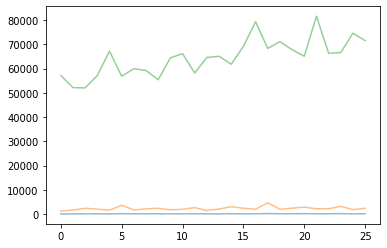

In [10]:
import matplotlib.pyplot as plt

plt.plot(s1.index, s1[0], alpha=0.5)
plt.plot(s2.index, s2[0], alpha=0.5)
plt.plot(s3.index, s3[0], alpha=0.5);


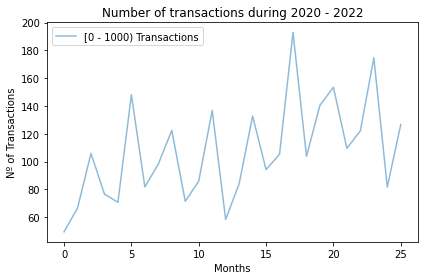

In [47]:
plt.plot(s1.index, s1[0], alpha=0.5, label="[0 - 1000) Transactions")
plt.title("Number of transactions during 2020 - 2022")
plt.ylabel("Nº of Transactions")
plt.legend() # loc='center left', bbox_to_anchor=(1, 0.5)
plt.xlabel("Months")
plt.tight_layout()
plt.show();

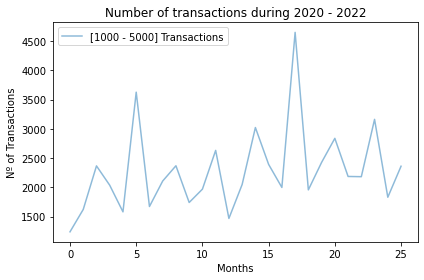

In [46]:
plt.plot(s2.index, s2[0], alpha=0.5, label="[1000 - 5000] Transactions")
plt.title("Number of transactions during 2020 - 2022")
plt.ylabel("Nº of Transactions")
plt.legend() # loc='center left', bbox_to_anchor=(1, 0.5)
plt.xlabel("Months")
plt.tight_layout()
plt.show();

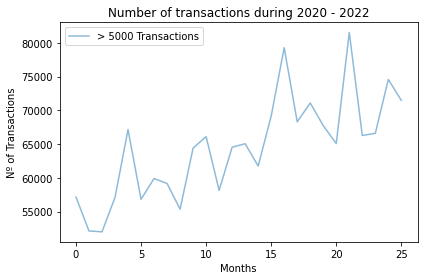

In [45]:
plt.plot(s3.index, s3[0], alpha=0.5, label="> 5000 Transactions")
plt.title("Number of transactions during 2020 - 2022")
plt.ylabel("Nº of Transactions")
plt.legend() # loc='center left', bbox_to_anchor=(1, 0.5)
plt.xlabel("Months")
plt.tight_layout()
plt.show();